In [3]:
#Improing Computer vision accuracy using comnvulations
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
trainiing_images = training_images/255.0
test_images= test_images/255.0
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                   tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
test_loss = model.evaluate(test_images, test_labels)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 69us/sample - loss: 3.3926 - accuracy: 0.6797
Epoch 2/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.7182 - accuracy: 0.7516
Epoch 3/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.5819 - accuracy: 0.7948
Epoch 4/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.5367 - accuracy: 0.8146
Epoch 5/5
60000/60000 [==============================] - 3s 53us/sample - loss: 0.5261 - accuracy: 0.8221
10000/1 [======================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [11]:
#How to make the previous accuracy better, one way is to use something called convulutions. Basically the 
#concept of convulutional newral netwok tell about add some layers to do convolutions before you have the dense layers, and then the informations
#going to the dense lavers is more focussed , and possibly more accurate
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images = training_images.reshape(60000,28,28,1)
training_images = training_images/255.0
test_images = test_images.reshape(10000,28,28,1)
test_images = test_images/255.0
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(64,(3,3), activation='relu',input_shape=(28,28,1)),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(128, activation='relu'),
                                   tf.keras.layers.Dense(10, activation = 'softmax')])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5)
test_loss = model.evaluate(test_images, test_labels)


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [12]:
"""step 1 - gather the daa but in this case there a bit of change here in that the training needed to be reshaped
thats because the first convolutions expects a single tensor containing everything, so insteadf of 60000 28*28*1 items iin a list we shaped a
single 4d list that is 60000*28*28*1 and the same for the testb data
If you dont do this you'll get an error when training as the convulutions do not recognize the shape
"""
"""Step2 is to define your model now instead of input layers on top yoyuare going to add a convulutions the parameters are
1=the number of convolutions you want to generate purely arbitary, but good to start with something in the order 
of 32
2-the size of convolutional grid in this case a 3*3 grid
3- the activations functions to use - in this caser we'll use relu, which you might recall is the equiivalent of returning x when x>0 else returning 0
4- In the first layers, the shape of the input data  """
"""You can call model.summary() to see the size and shape of the network, and you'll notice that after every MaxPooling layers, 
the image size is reduced in this way"""
"""add another convulutions,
now flatten the output. After this you will just hacve the same Dnn structure as the non convolutional version"""
"""The same 128 dense layers and 10 output layers as in the pre-convolution examples"""
"""NOw compile the models, cal, the fit method to do the training and evaluate the loss and accuracy from the test set"""


'st'

In [13]:
#Visualizingf the convulutions and pooling
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


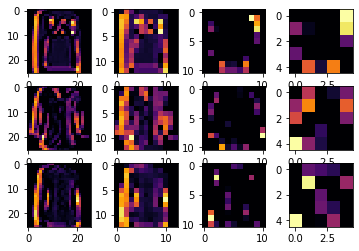

In [16]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=1
SECOND_IMAGE=4
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)